# Car Price EDA

The purpose of this EDA is to build on the foundational skills required in Data Science, as well as to find potential relationships/trends that can help in the future goal of building a predictive model for the prices of vehicles.

The primary goal for now is to visualize the data cleanly and develop some insights that can explain the story that the data is telling us.

Skills: Python, Pandas, Seaborn, Markdown

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
data = pd.read_csv('car_price_dataset.csv')

print("First, let's look at the first few rows of the data and the data shape.")

print("1. First 5 rows of the data")
print(data.head())

print("2. Dataset shape")
print(data.shape)

First, let's look at the first few rows of the data and the data shape.
1. First 5 rows of the data
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
2. Dataset shape
(10000, 10)


## Disclaimer: No null values or duplicate rows

I chose this dataset as a solid beginner dataset because of the abundance of entries (10,000 rows) and no missing values. This means there is little to no use for data cleaning, which is something I would like to dive deeper into within a future EDA perhaps. Again, the goal here is to simply complete an EDA and focus on other foundational skills. If I can't visualize the data well enough, what use is it if there's null/duplicate rows?

In [53]:
# Check for missing values and duplicates
print("Missing values\n")
print(data.isnull().sum())

print("\nDuplicates: " + str(data.duplicated().sum()))

Missing values

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

Duplicates: 0


## Initial Assumptions about Trends

As someone who understands the car market decently well (although, not to the extent of an expert of course), my initial assumptions before exploring farther into the dataset would include the following:

1. Car prices are uniformly distributed
2. As the mileage increases, we will see a decrease in price
3. As the number of owners increases, we will see a decrease in price as well
4. The newer the car based on year, the higher the price will be


## Potential Concerns/Limitations with the Dataset

1. Engine Sizes for EVs?
2. Missing Accident History

In my opinion, I believe some information regarding these cars is missing and if added, could give more insight towards relationships/trends. For example, since this dataset obviously includes used cars (implied with the mileages varying largely), it would be useful to see a column related to previous accidents. If a car has been in an accident, that can drastically impact its value (dependent on the severity of the accident).

Another issue I can potentially see is the strange way Electric cars are logged in this dataset. When we look at the rows for EVs, the Engine_Size column seems to imply that these cars could possibly have an engine rather than a motor like regular fully electric cars. This could be due to a lack in refined constraints in the Fuel_Type column. For example, the 2023 Audi Q5 is marked as an electric car but that doesn't make any sense since it is a hybrid vehicle unless they mean the Audi Q5 e-tron, which is a different specification. Regardless, it is either an issue of the name being inaccurate, or they are marking some hybrid vehicles as electric, both of which can be problematic.

I would have also liked to see some more context to this dataset; who collected the data, where was it collected, what were these cars for, etc. Whether these cars are from a dealership, or pulled from a private seller's website (Facebook Marketplace, Kijiji, Craigslist, etc) can give us more insight as to what this data is telling us and how we can interpret it. This is a smaller concern but would very likely enhance the actual dataset in my opinion.

Overall, these issues are not a large concern but I wanted to include these as something I have noticed while looking into the dataset's features and curiosity of their constraints myself. This will not affect the findings largely and the goal isn't to have a perfect evaluation of the data.

## First Insight: The price of cars in this dataset seems to follow a fairly normal distribution

When we plot the distribution of prices with their frequencies, we notice a distirbution similar to a normal distribution. I added a Kernel Density Estimation to round off the graph and show the similarity to the normal distribution. Out of curiousity, I added vertical lines to demonstrate the mean of the data in red, as well as where 1 standard deviation on each side of the mean. This adds another layer of visual aids to further demonstrate this interesting distribution. At first glance, I would say that most "buyers" would expect to spend $8,000, give or take $2,000 on a car from this dataset. 

When I evaluate the percentage of cars who's price is within 1 standard deviation of the mean, we get roughly 66%, which is almost exactly what we would expect to see from a normal distribution.

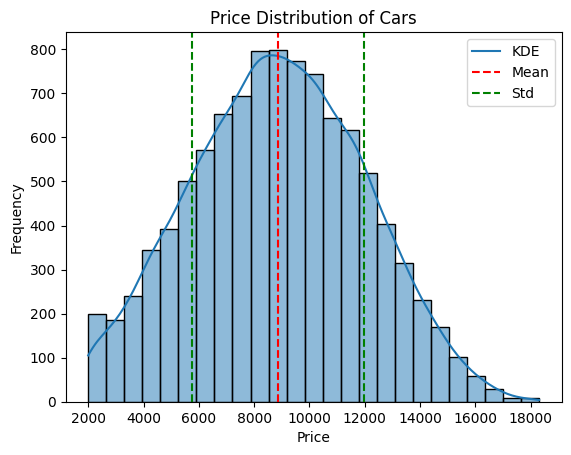

Average price of a car: 8852.9644
Percentage of cars within 1 standard deviation of the mean: 66.15%


In [54]:
mean = data['Price'].mean()
std = data['Price'].std() 

sns.histplot(data['Price'], bins=25, kde=True)
# Show the mean and standard deviation on this graph
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(mean + std, color='g', linestyle='--')
plt.axvline(mean - std, color='g', linestyle='--')
plt.legend({'KDE':data, 'Mean':mean,'Std':std})
plt.title('Price Distribution of Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


print("Average price of a car: " + str(mean))

 
within_1_std = data[(data['Price'] > mean - std) & (data['Price'] < mean + std)]
within_1_std = within_1_std.shape[0]/data.shape[0] * 100
within_1_std = round(within_1_std, 2)
print("Percentage of cars within 1 standard deviation of the mean: " + str(within_1_std) + "%")

## Second Insight: As the mileage increases, the price tends to decrease

This isn't some sort of revelation when it comes to cars, but it is nice to see the data confirm our suspicions. When a car gets older, we notice a downward trend in price. As a car attains more miles on its odometer, it's is seen as a riskier purchase for several reasons. The goal now isn't to discuss the pros and cons of older cars, or to look into the psychology of buyers, but rather to notice these trends and bring them to our attention.

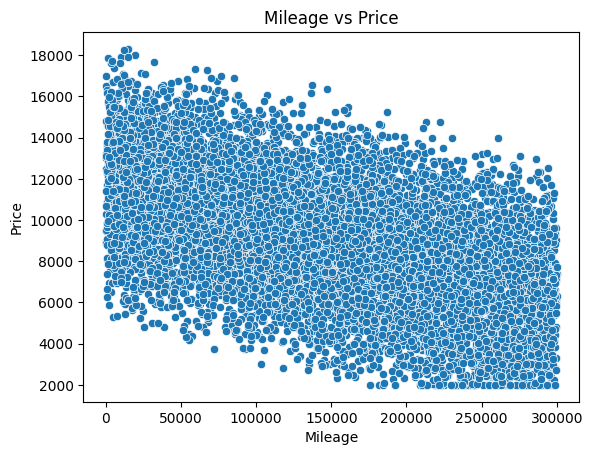

In [55]:
sns.scatterplot(x='Mileage', y='Price', data=data)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

## Third Insight: The number of previous owners does not have an impact on mileage or price

This is a two for one sort of insight but I believe they are too close to not lump together. A common idea is that if a car has multiple previous owners, we would see it as a riskier purchase, therefore we expect the mileage to be higher along for a lower price. Although we have already shown the relation between mileage and price, when looking through the lens of owner count, I do not see any noteable trends in the box plots below that would lead me to believe that it has any sort of impact on these features. It seems safe to say that owner count is not correlated with the mileage and the same seems to go for price.

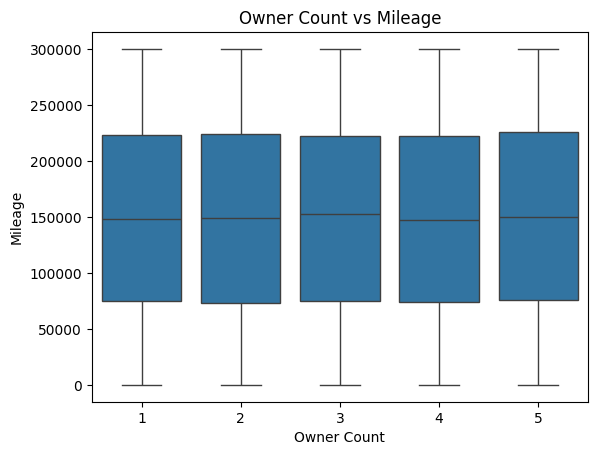

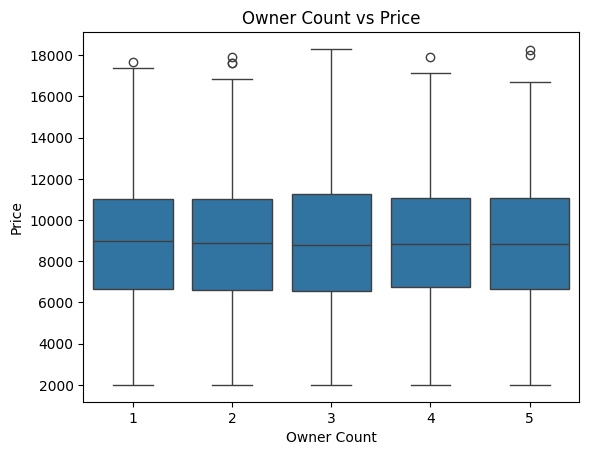

In [56]:
sns.boxplot(x='Owner_Count', y='Mileage', data=data)
plt.title('Owner Count vs Mileage')
plt.xlabel('Owner Count')
plt.ylabel('Mileage')
plt.show()

sns.boxplot(x='Owner_Count', y='Price', data=data)
plt.title('Owner Count vs Price')
plt.xlabel('Owner Count')
plt.ylabel('Price')
plt.show()


## Fourth Insight: Larger engine sizes is correlated to a higher price

The following lineplot gives us some information regarding other trends related to price. We can see that as the engine size increases, there is a strong indication that the price also increases along with it. This makes sense as larger vehicles such as trucks tend to have larger engines and are typically more expensive than smaller cars with smaller engines. Another bit of information we can pull from this graph is the difference with transmission types shown through the hue of the graph. manual and semi-automatic cars seem to be very closely related in price, whereas automatic transmission cars are always more expensive by some margin. This means buyers can save some money by buying a manual car.

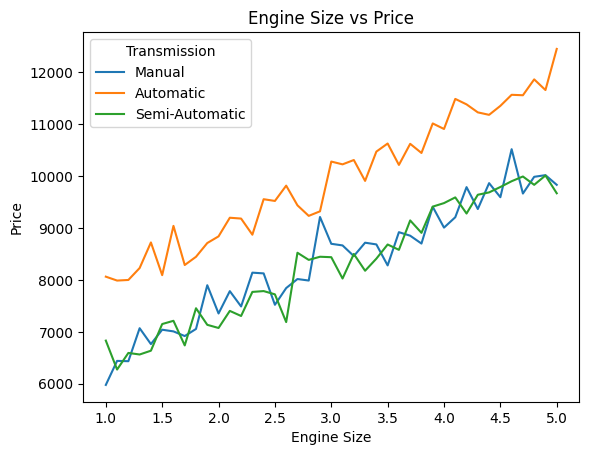

In [57]:
sns.lineplot(x = "Engine_Size", y = "Price", data = data, hue = "Transmission", errorbar = None)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

## Fifth Insight: Newer cars are more expensive (as expected)
## Sixth Insight: Hybrid and electric cars are more expensive than diesel/petrol

Although this isn't anything new for anyone to see, but we can see that there is a strong trend that newer cars are more expensive than older ones. Also, the hue of this line plot shows us a second insight, which is that hybrid and electric cars are always more expensive than your typical diesel/petrol cars. This also intererstingly shows us that diesel and petrol cars are very similarly priced. 

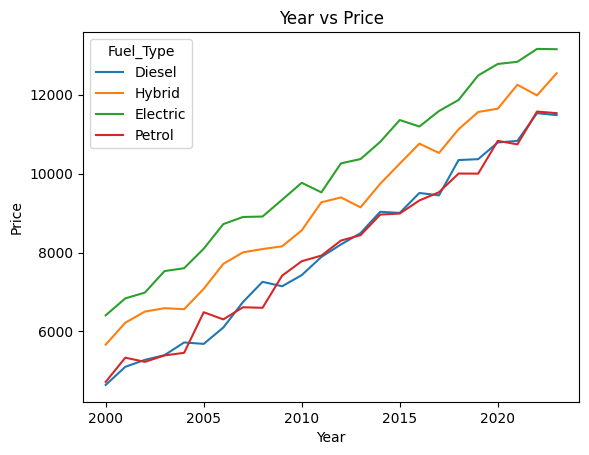

In [58]:
sns.lineplot(x = "Year", y = "Price", data = data, hue = "Fuel_Type", errorbar = None)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()